In [1]:
import txsim as tx
import scanpy as sc
import os
import pandas as pd
from anndata import AnnData
import numpy as np
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import xb.formatting as xf
import seaborn as sns
import random 
import matplotlib.pyplot as plt

In [2]:
maindir='../../data/unprocessed_adata'
files=os.listdir(maindir)

In [3]:
files=files[5:6]

In [4]:
for fl in files:
    print(fl)
    adata=sc.read(maindir+'/'+fl)
    adata.X=adata.X.todense()   
    adata=adata[:,adata.var['in_panel'].isin([True,'gene'])]    
    try:
        adata.layers['lognorm']=adata.X.todense()
    except:
        adata.layers['lognorm']=adata
    try:
        adata.layers['raw']=adata.X.todense()
    except:
        adata.layers['raw']=adata.X
    adata.uns['spots']['x']=adata.uns['spots']['x_location']
    adata.uns['spots']['y']=adata.uns['spots']['y_location']
    adata.obs['x']=list(adata.obs['x_centroid'])
    adata.obs['y']=list(adata.obs['y_centroid'])
    qlm1=tx.quality_metrics._combined.all_quality_metrics(adata)
    qlm1.columns=[fl[:-5]]
    qlm1.loc['area',fl[:-5]]=float(xf.cell_area(adata))
    qlm1.loc['reads_prop_qv>20',fl[:-5]]=np.sum(adata.uns['spots'].loc[:,'qv']>20)/adata.uns['spots'].shape[0]
    qlm1.loc['total_reads',fl[:-5]]=adata.uns['spots'].shape[0]
    adata.var.index=adata.var['gene_id']
    qlm1.loc['prop_reads_in_panel',fl[:-5]]=np.sum(adata.uns['spots']['feature_name'].isin(adata.var.index[adata.var['in_panel'].isin([True,'gene'])]))/adata.uns['spots'].shape[0]
    qlm1.loc['prop_reads_assigned_to_cells',fl[:-5]]=int(np.sum(adata.X))/np.sum(adata.uns['spots']['feature_name'].isin(adata.var.index[adata.var['in_panel'].isin([True,'gene'])]))
    qlm1.loc['proportion_cells>10reads',fl[:-5]]=np.sum((np.sum(adata.X,axis=1)>5))/adata.shape[0]
    try: 
        out=pd.merge(out,qlm1,right_index=True,left_index=True)
    except:
        out=qlm1

ms_brain_multisection3.h5ad


In [5]:
out=qlm1

In [6]:
out=out.round(2)

In [7]:
out.to_csv(r'../../figures/tables/supp1_raw_information_jan23_samp3.csv')

# Plotting quality of reads

In [20]:
for fl in files:
    adata=sc.read(maindir+'/'+fl)
    adata=adata[:,adata.var['in_panel']]
    res=adata.uns['spots']
    res=res[res['overlaps_nucleus']==1]
    res['sample']=fl[:-5]
    sel=random.sample(range(0,res.shape[0]),100000)
    res=res.iloc[sel,:]
    try: 
        out=pd.concat([out,res],axis=0)
    except:
        out=res
    print(out.shape)

KeyboardInterrupt: 

In [ ]:
out=out.reset_index

In [ ]:
sns.displot(out, x="qv",hue='sample', kind="kde", bw_adjust=2)
plt.xlim(0,50)
plt.xlabel('qv')
plt.savefig('../../figures/quality_plots/qv_by_sample_nuclei.pdf')

# PLOTTING FOR FIGURES

In [3]:
import txsim as tx
import scanpy as sc
import os
import pandas as pd
from anndata import AnnData
import numpy as np
#from scipy.spatial import ConvexHull, convex_hull_plot_2d
#import xb.formatting as xf
import seaborn as sns
import random 
import matplotlib.pyplot as plt

In [4]:
ads=[]
maindir='../../data/unprocessed_adata'
files=os.listdir(maindir)

In [5]:
files=list(files[0:3])+list(files[6:7]+list(files[3:6])+list(files[7:]))

In [6]:
for fl in files:
    print(fl)
    adata=sc.read(maindir+'/'+fl)
    adata1=adata
    subset1=adata1.uns['spots'].loc[adata1.uns['spots']['overlaps_nucleus']==1,:]
    ct1=pd.crosstab(subset1['cell_id'],subset1['feature_name'])
    adataobs=adata1.obs.loc[adata1.obs['cell_id'].isin(ct1.index),:]
    adata1.var.index=adata1.var['gene_id']
    ct1=ct1.loc[:,adata1.var.index]
    adataobs.index=adataobs['cell_id']
    adataobs.index.name='ind'
    ct1=ct1.loc[ct1.index.isin(adataobs['cell_id']),:]
    adata1nuc=sc.AnnData(np.array(ct1),obs=adataobs,var=adata1.var)
    ads.append(adata1nuc)

h_breast_1.h5ad


/tmp/ipykernel_495/2698581242.py:13: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata1nuc=sc.AnnData(np.array(ct1),obs=adataobs,var=adata1.var)
/home/sergioms/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


h_breast_2.h5ad


/tmp/ipykernel_495/2698581242.py:13: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata1nuc=sc.AnnData(np.array(ct1),obs=adataobs,var=adata1.var)
/home/sergioms/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


ms_brain_fullcoronal.h5ad


/tmp/ipykernel_495/2698581242.py:13: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata1nuc=sc.AnnData(np.array(ct1),obs=adataobs,var=adata1.var)
/home/sergioms/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


ms_brain_partialcoronal.h5ad


/tmp/ipykernel_495/2698581242.py:13: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata1nuc=sc.AnnData(np.array(ct1),obs=adataobs,var=adata1.var)
/home/sergioms/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


ms_brain_multisection1.h5ad


/tmp/ipykernel_495/2698581242.py:13: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata1nuc=sc.AnnData(np.array(ct1),obs=adataobs,var=adata1.var)
/home/sergioms/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


ms_brain_multisection2.h5ad


/tmp/ipykernel_495/2698581242.py:13: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata1nuc=sc.AnnData(np.array(ct1),obs=adataobs,var=adata1.var)
/home/sergioms/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


ms_brain_multisection3.h5ad


/tmp/ipykernel_495/2698581242.py:13: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata1nuc=sc.AnnData(np.array(ct1),obs=adataobs,var=adata1.var)
/home/sergioms/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


ms_brain_rep1.h5ad


/tmp/ipykernel_495/2698581242.py:13: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata1nuc=sc.AnnData(np.array(ct1),obs=adataobs,var=adata1.var)
/home/sergioms/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


ms_brain_rep2.h5ad


/tmp/ipykernel_495/2698581242.py:13: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata1nuc=sc.AnnData(np.array(ct1),obs=adataobs,var=adata1.var)
/home/sergioms/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


ms_brain_rep3.h5ad


/tmp/ipykernel_495/2698581242.py:13: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata1nuc=sc.AnnData(np.array(ct1),obs=adataobs,var=adata1.var)
/home/sergioms/.local/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [7]:
#del obsall
for n in range(0,len(files)):
    ads[n].obs['total_genes']=list(np.sum((ads[n].X>0)*1,axis=1))
    ads[n].obs['sample']=files[n]
    try:
        obsall=pd.concat([obsall,ads[n].obs])
    except:
        obsall=ads[n].obs

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
g = np.tile(list("ABCDEFGHIJ"), 50)


In [9]:
obsall=obsall.reset_index()

In [10]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
pal[0]=[230/255, 69/255, 106/255]
pal[1]=[230/255, 69/255, 160/255]
pal[2]=[247/255, 160/255, 123/255]
pal[3]=[247/255, 198/255, 124/255]
pal[4]=[49/255, 199/255, 42/255]
pal[5]=[38/255, 171/255, 106/255]
pal[6]=[23/255, 145/255, 99/255]

In [11]:
obsallsub=obsall[obsall['sample'].isin([np.unique(obsall['sample'])[0]])]
xl=np.mean(obsallsub['total_counts'])

In [12]:
#obsall['sample'][obsall['sample']=='ms_brain_partialcoronal.h5ad']='ms_brain_halfcoronal.h5ad'

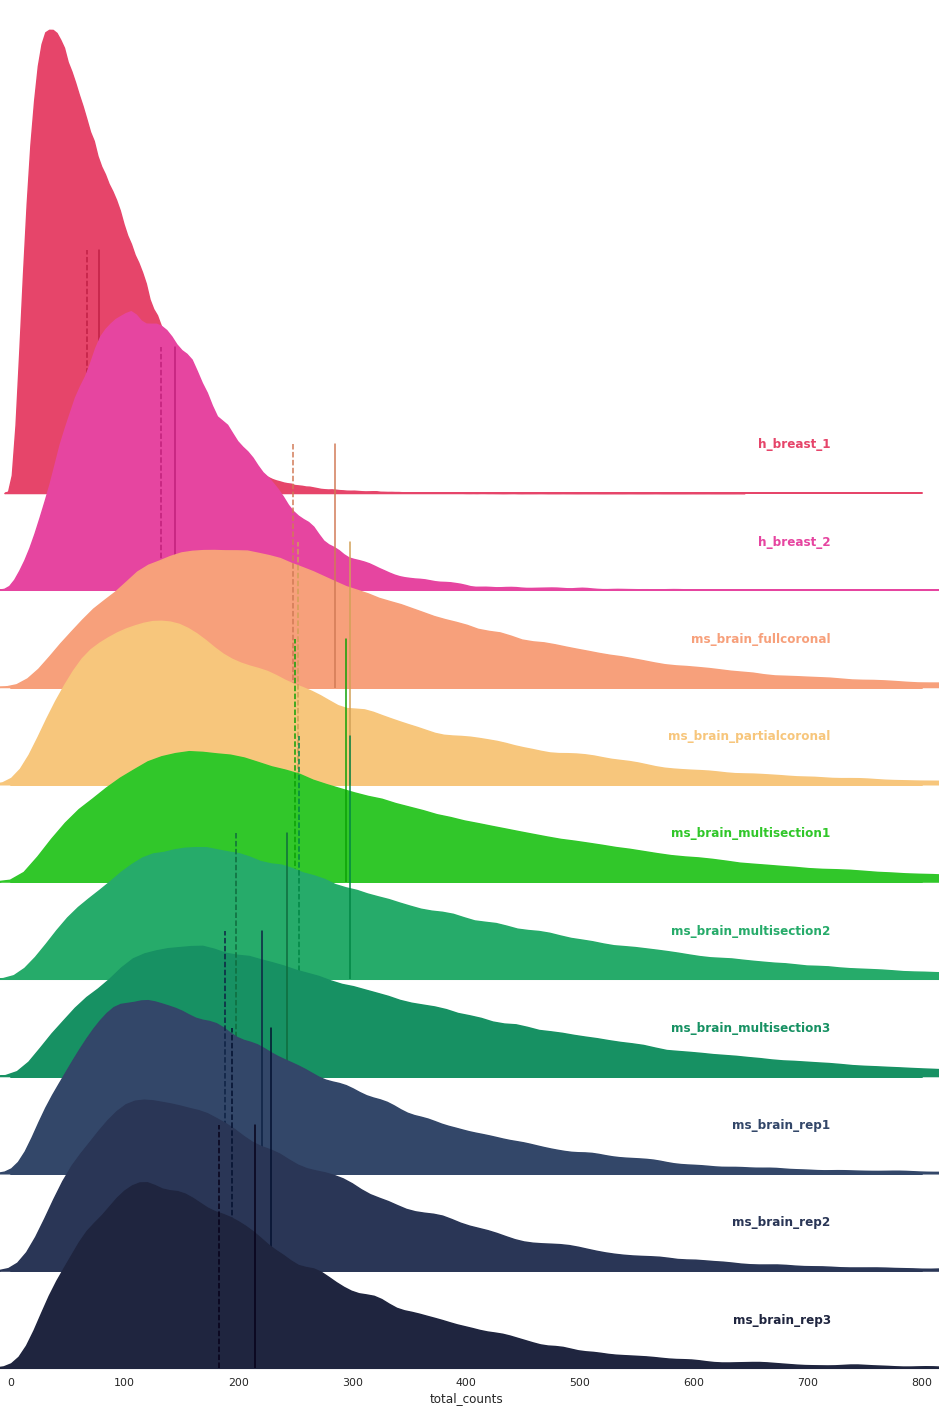

In [13]:
# Initialize the FacetGrid object
#pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(obsall, row="sample", hue="sample",aspect=7, height=2, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "total_counts",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
#g.map(sns.kdeplot, "total_counts", clip_on=False, color="w", lw=2, bw_adjust=.5)
#plt.xlim([0,100])
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

#g.refline(x=20, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.9, .1, label[:-5], fontweight="bold", color=color,
            ha="right", va="center", transform=ax.transAxes)

s=0
for ax in g.axes_dict.values():
    obsallsub=obsall[obsall['sample'].isin([np.unique(obsall['sample'])[s]])]
    xl=np.median(obsallsub['total_counts'])
    pal2=[abs(pal[s][0]-0.15),abs(pal[s][1]-0.15),abs(pal[s][2]-0.15)]
    ax.axvline(x=xl, ls="--",color=pal2,ymax=0.5)
    s=s+1

s=0
for ax in g.axes_dict.values():
    obsallsub=obsall[obsall['sample'].isin([np.unique(obsall['sample'])[s]])]
    xl=np.mean(obsallsub['total_counts'])
    pal2=[abs(pal[s][0]-0.15),abs(pal[s][1]-0.15),abs(pal[s][2]-0.15)]
    ax.axvline(x=xl,color=pal2,ymax=0.5)
    s=s+1


g.map(label, "total_counts")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.8)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.xlim([0,800])
plt.savefig('../../figures/quality_plots/transcripts_frequencies_nuclei_10samples.pdf',dpi=500)

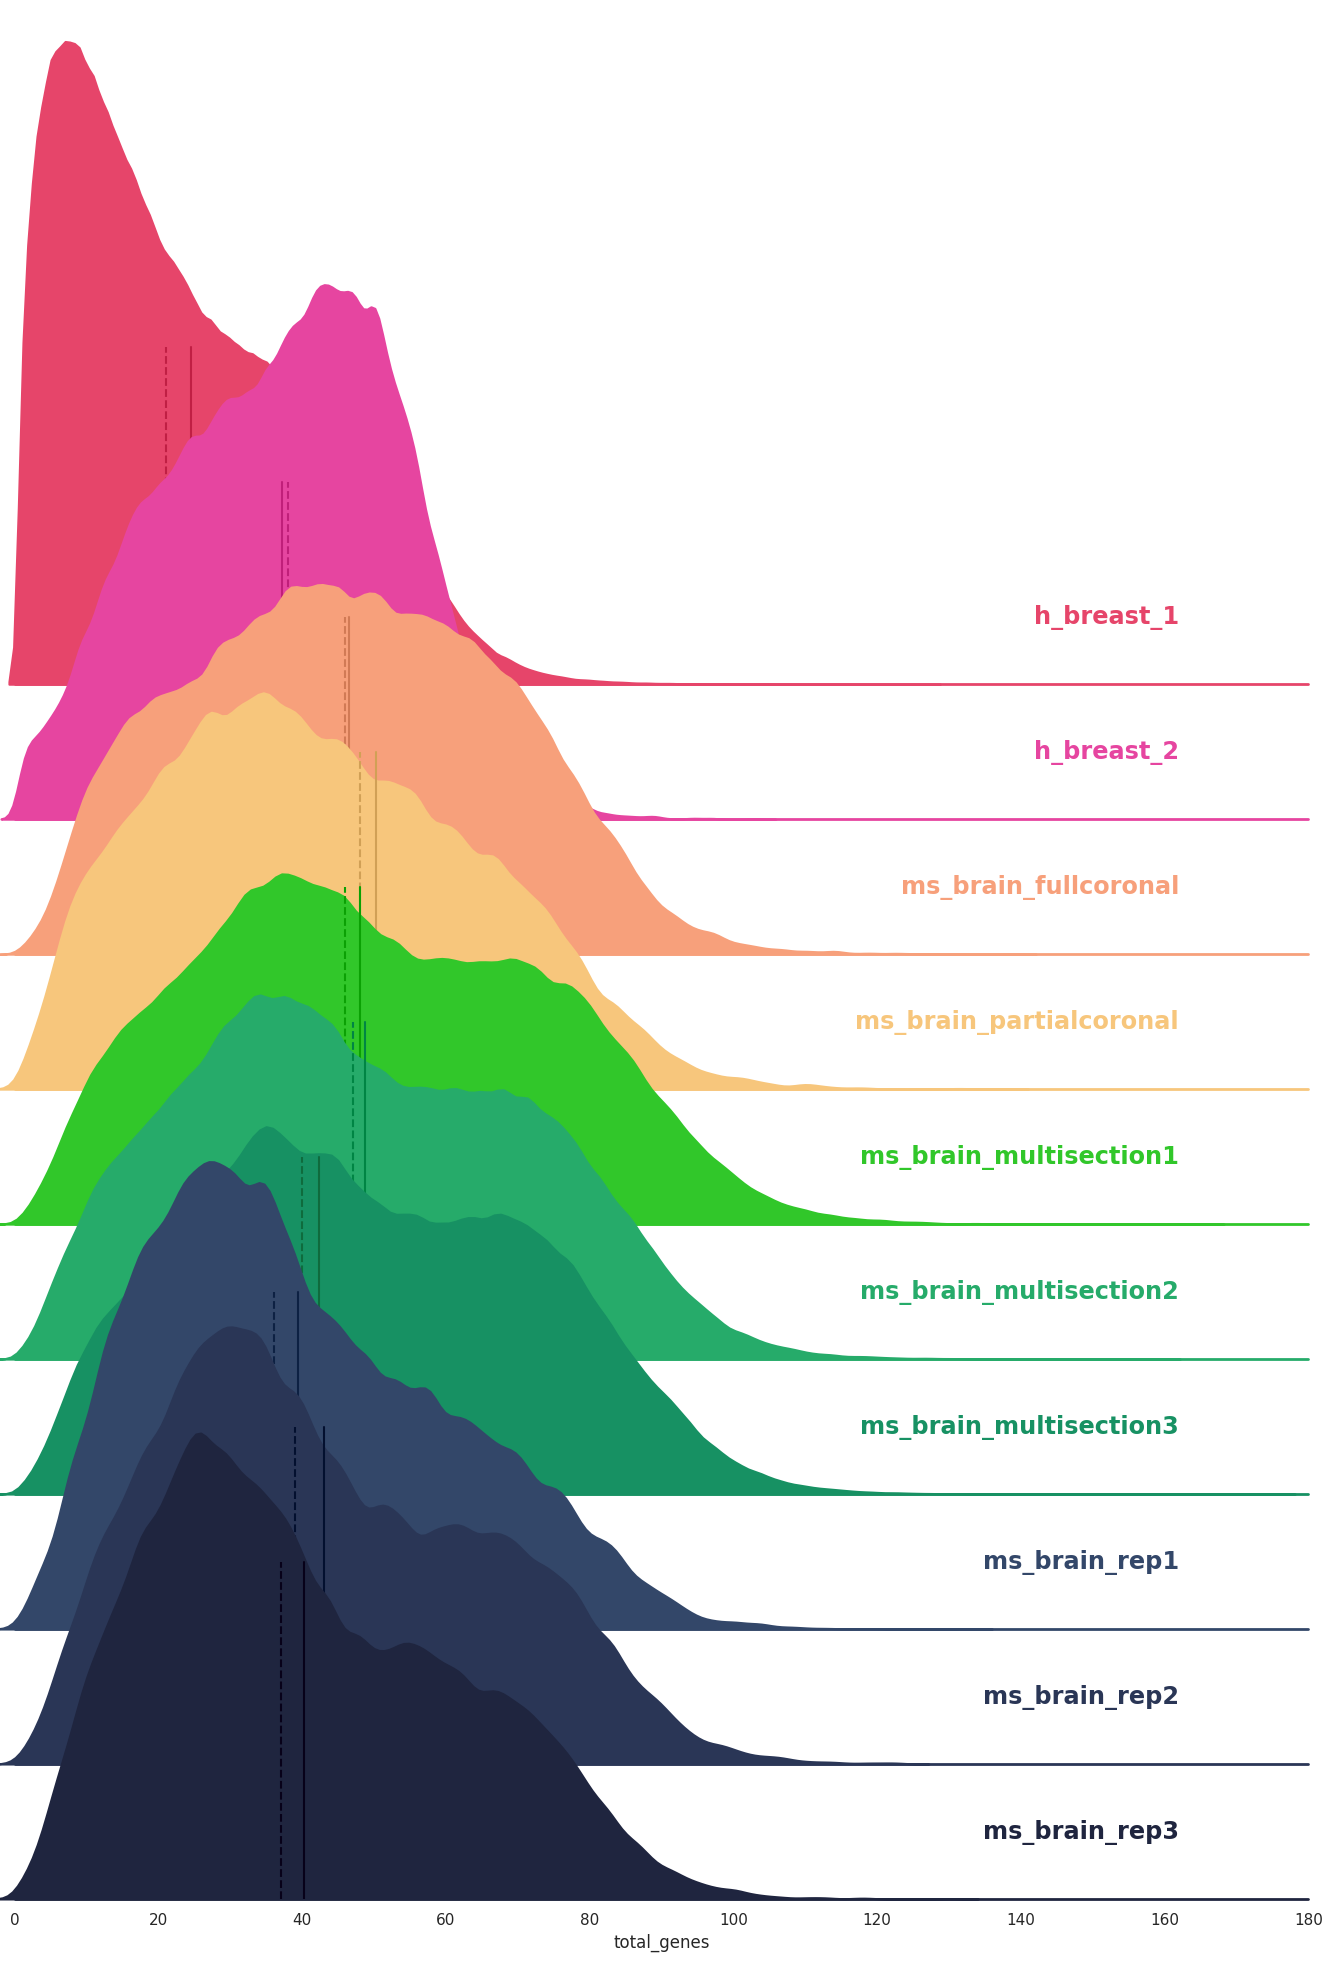

In [16]:
# Initialize the FacetGrid object
#pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(obsall, row="sample", hue="sample",aspect=7, height=2, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "total_genes",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
#g.map(sns.kdeplot, "total_counts", clip_on=False, color="w", lw=2, bw_adjust=.5)
#plt.xlim([0,100])
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

#g.refline(x=20, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.9, .1, label[:-5], fontweight="bold", color=color,
            ha="right", va="center", transform=ax.transAxes,fontsize='x-large')

s=0
for ax in g.axes_dict.values():
    obsallsub=obsall[obsall['sample'].isin([np.unique(obsall['sample'])[s]])]
    xl=np.median(obsallsub['total_genes'])
    pal2=[abs(pal[s][0]-0.15),abs(pal[s][1]-0.15),abs(pal[s][2]-0.15)]
    ax.axvline(x=xl, ls="--",color=pal2,ymax=0.5)
    s=s+1

s=0
for ax in g.axes_dict.values():
    obsallsub=obsall[obsall['sample'].isin([np.unique(obsall['sample'])[s]])]
    xl=np.mean(obsallsub['total_genes'])
    pal2=[abs(pal[s][0]-0.15),abs(pal[s][1]-0.15),abs(pal[s][2]-0.15)]
    ax.axvline(x=xl,color=pal2,ymax=0.5)
    s=s+1


g.map(label, "total_genes")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.8)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.xlim([0,180])
plt.savefig('../../figures/quality_plots/gene_frequencies_nuclei_10samples.pdf',dpi=500)

In [17]:
obsall['nucleus_ratio']=list((obsall['nucleus_area']/(obsall['nucleus_area']+obsall['cell_area']))*100)

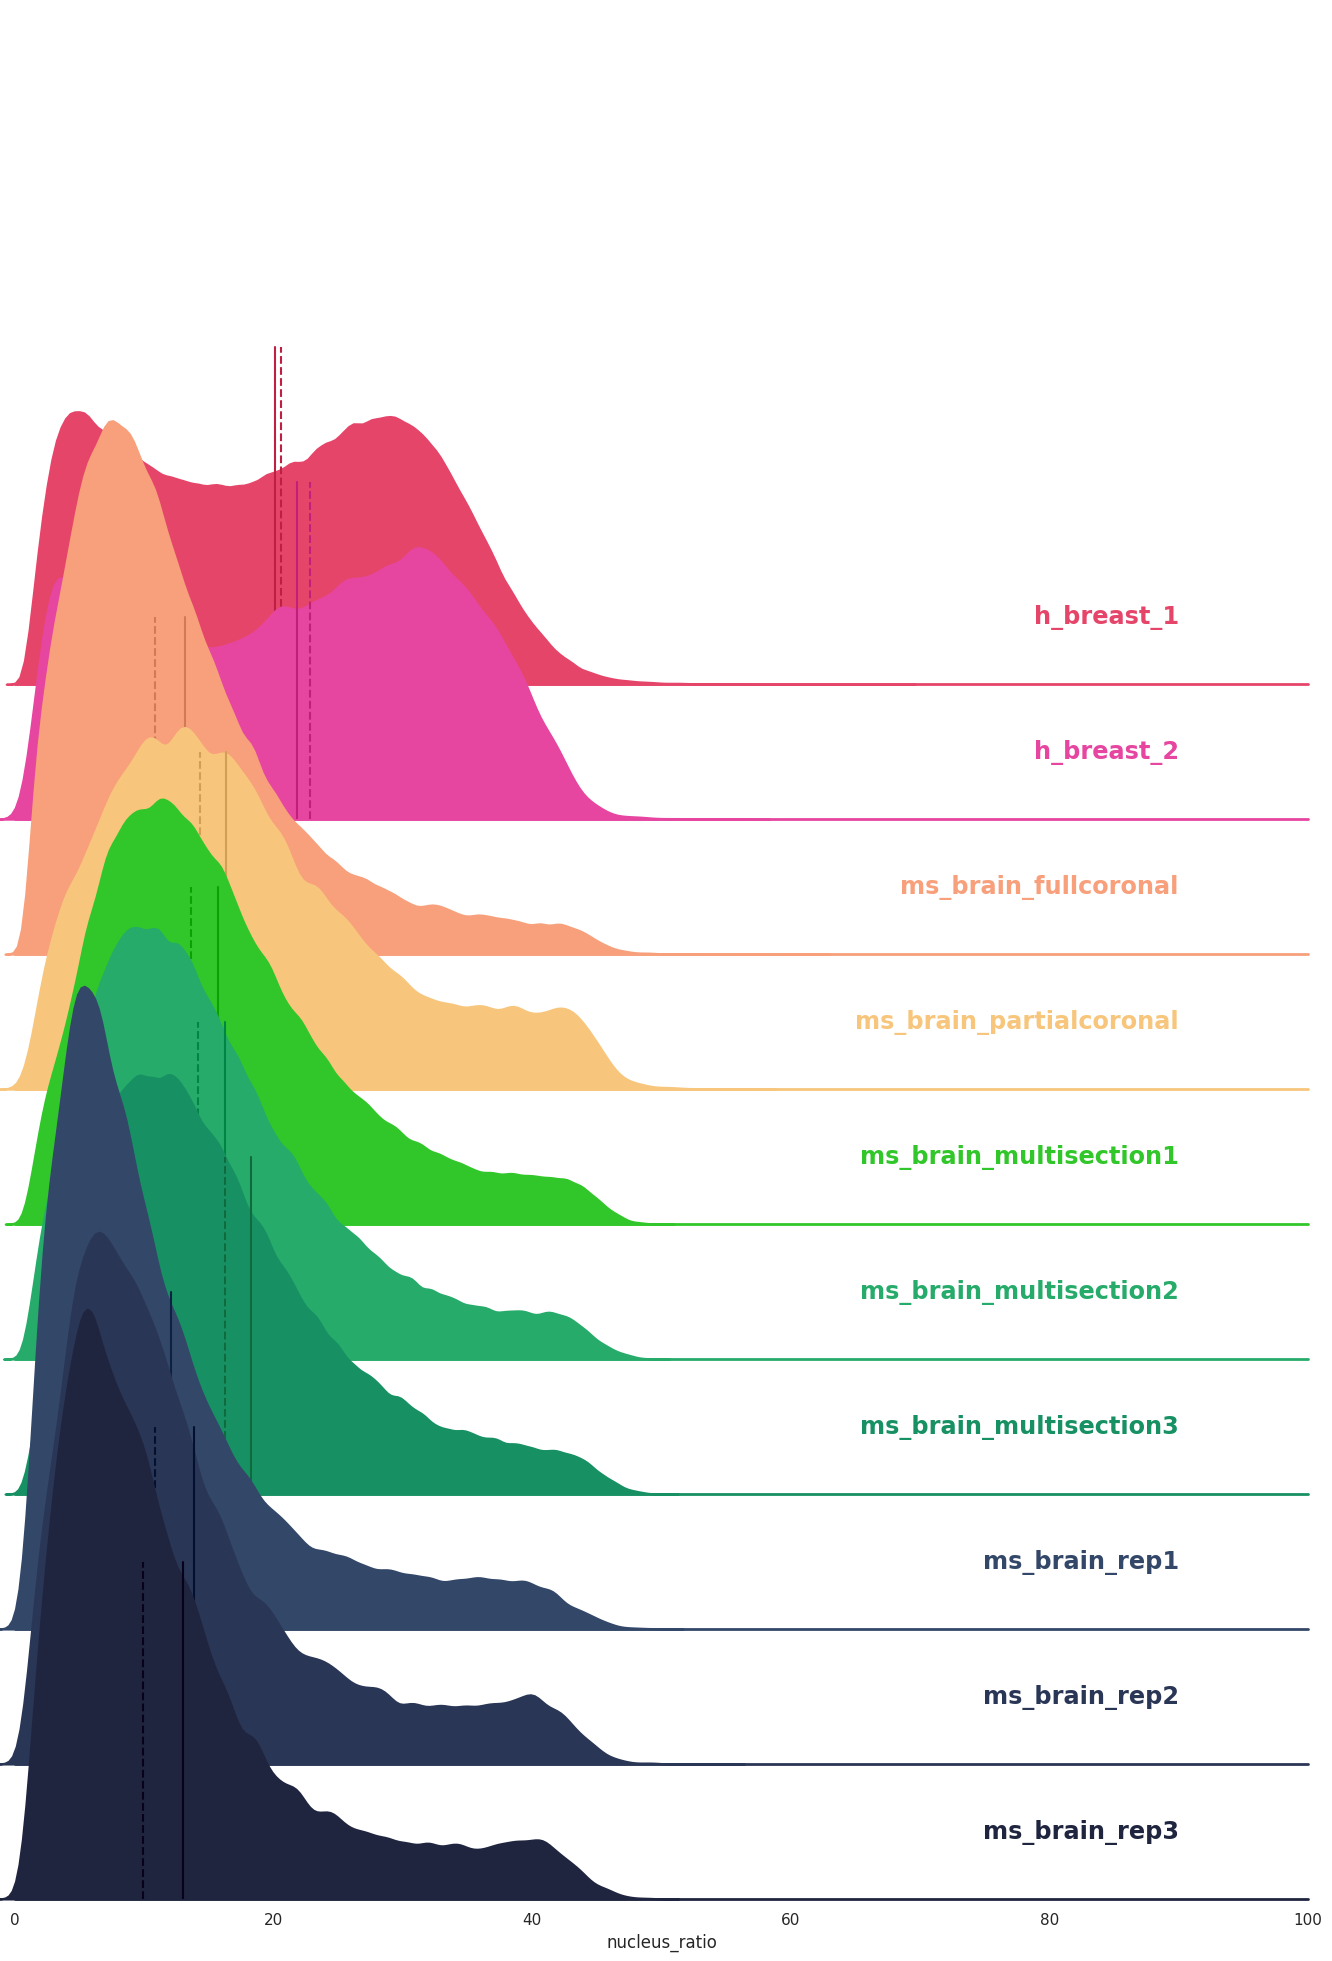

In [18]:
# Initialize the FacetGrid object
#pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(obsall, row="sample", hue="sample",aspect=7, height=2, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "nucleus_ratio",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
#g.map(sns.kdeplot, "total_counts", clip_on=False, color="w", lw=2, bw_adjust=.5)
#plt.xlim([0,100])
# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

#g.refline(x=20, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.9, .1, label[:-5], fontweight="bold", color=color,
            ha="right", va="center", transform=ax.transAxes,fontsize='x-large')

s=0
for ax in g.axes_dict.values():
    obsallsub=obsall[obsall['sample'].isin([np.unique(obsall['sample'])[s]])]
    xl=np.median(obsallsub['nucleus_ratio'])
    pal2=[abs(pal[s][0]-0.15),abs(pal[s][1]-0.15),abs(pal[s][2]-0.15)]
    ax.axvline(x=xl, ls="--",color=pal2,ymax=0.5)
    s=s+1

s=0
for ax in g.axes_dict.values():
    obsallsub=obsall[obsall['sample'].isin([np.unique(obsall['sample'])[s]])]
    xl=np.mean(obsallsub['nucleus_ratio'])
    pal2=[abs(pal[s][0]-0.15),abs(pal[s][1]-0.15),abs(pal[s][2]-0.15)]
    ax.axvline(x=xl,color=pal2,ymax=0.5)
    s=s+1


g.map(label, "nucleus_ratio")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.8)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.xlim([0,100])
plt.savefig('../../figures/quality_plots/nuclei_percentage_10samples.pdf',dpi=500)